<a href="https://colab.research.google.com/github/AmilcarArmmand/DSC-Data-Visualization/blob/main/Activity_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1
  - Create a Dataframe called daily that includes daily crossings and total daily precipitaion.
  - Create such a DataFrame using a Boolean condition where precipitation > 0.25 inches.
  - Create a scatter plot with a trend line with precipitation on the x-axis, and total daily crossings on the y-axis.

In [1]:
import pandas as pd
import seaborn as sns
URL = 'https://storage.googleapis.com/scsu-data-science/brooklyn_bridge_pedestrians.csv'
df = pd.read_csv(URL,
                 parse_dates=True,
                 index_col='hour_beginning')
df.head()

,pedestrians,to_manhattan,to_brooklyn,weather_summary,temperature,precipitation,events
hour_beginning,,,,,,,
2017-10-01 00:00:00,44,30,14,clear-night,52.0,0.0001,NaN
2017-10-01 01:00:00,30,17,13,partly-cloudy-night,53.0,0.0002,NaN
2017-10-01 02:00:00,25,13,12,partly-cloudy-night,52.0,0.0000,NaN
2017-10-01 03:00:00,20,11,9,partly-cloudy-night,51.0,0.0000,NaN
2017-10-01 04:00:00,18,10,8,partly-cloudy-night,51.0,0.0000,NaN


In [2]:
daily = df.resample('D').sum()
daily.head(10)

,pedestrians,to_manhattan,to_brooklyn,weather_summary,temperature,precipitation,events
hour_beginning,,,,,,,
2017-10-01,25687,13231,12456,clear-nightpartly-cloudy-nightpartly-cloudy-ni...,1372.0,0.0004,0
2017-10-02,18028,9544,8484,clear-nightclear-nightclear-nightclear-nightcl...,1417.0,0.0000,0
2017-10-03,16580,8709,7871,clear-nightclear-nightclear-nightclear-nightcl...,1406.0,0.0008,0
2017-10-04,17533,9417,8116,clear-nightclear-nightclear-nightclear-nightcl...,1500.0,0.0002,0
2017-10-05,17980,9318,8662,clear-nightclear-nightpartly-cloudy-nightpartl...,1709.0,0.0374,0
2017-10-06,20089,10414,9675,partly-cloudy-nightpartly-cloudy-nightpartly-c...,1711.0,0.0063,0
2017-10-07,31610,16362,15248,clear-nightclear-nightclear-nightclear-nightpa...,1706.0,0.0000,0
2017-10-08,19993,9669,10324,partly-cloudy-nightclear-nightpartly-cloudy-ni...,1759.0,0.0103,0
2017-10-09,8985,4449,4536,clear-nightpartly-cloudy-nightpartly-cloudy-ni...,1745.0,0.0291,Columbus Day (regional holiday)Columbus Day (r...


In [3]:
daily = daily[daily['precipitation'] > 0.25]
daily.head()

,pedestrians,to_manhattan,to_brooklyn,weather_summary,temperature,precipitation,events
hour_beginning,,,,,,,
2017-10-29,3281,1636,1645,partly-cloudy-nightpartly-cloudy-nightpartly-c...,1499.0,2.3265,0
2017-10-30,17774,9253,8521,rainclear-nightpartly-cloudy-nightpartly-cloud...,1273.0,0.2650,0
2017-11-07,9771,4706,5065,clear-nightclear-nightclear-nightclear-nightcl...,1044.0,0.4628,0
2017-12-05,8119,3794,4325,partly-cloudy-nightpartly-cloudy-nightpartly-c...,1305.0,0.2764,0
2017-12-23,5080,2698,2382,partly-cloudy-nightpartly-cloudy-nightpartly-c...,1008.0,0.4278,0


Text(0, 0.5, 'Daily Crossings')

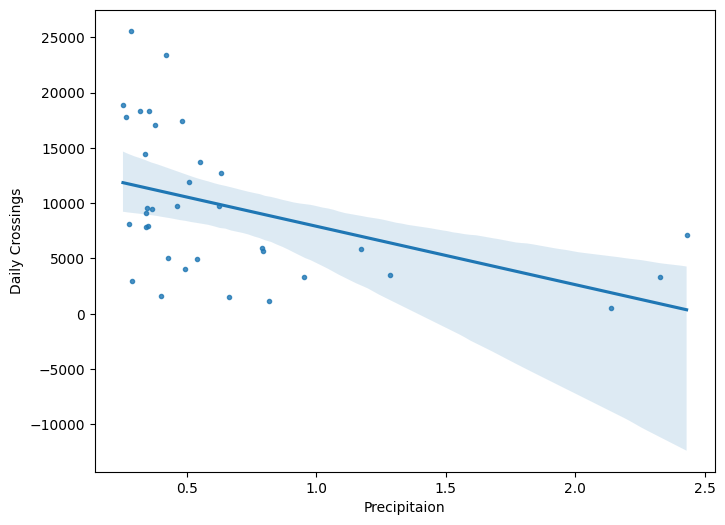

In [4]:
ax = sns.regplot(x = 'precipitation', y = 'pedestrians', data=daily, marker='.')
ax.figure.set_size_inches(8, 6)
ax.set_xlabel('Precipitaion')
ax.set_ylabel('Daily Crossings')

## Exercise 2: Generate the following 3 plots
  - Plot daily stock closing price.
  - Weekly average closing price.  You will need to use the resample function.
  - Plot of the 30-day rolling mean


In [16]:
import pandas as pd
URL2 = 'https://storage.googleapis.com/scsu-data-science/google_stock_hist.csv'
stocks = pd.read_csv(URL2,
                  parse_dates=True,
                  index_col='date')
stocks.head()

,symbol,close,high,low,open,volume
date,,,,,,
2017-10-12 00:00:00+00:00,GOOG,987.83,994.1200,985.0000,987.45,1259082
2017-10-13 00:00:00+00:00,GOOG,989.68,997.2100,989.0000,992.00,1143907
2017-10-16 00:00:00+00:00,GOOG,992.00,993.9065,984.0000,992.10,900751
2017-10-17 00:00:00+00:00,GOOG,992.18,996.4400,988.5900,990.29,1266399
2017-10-18 00:00:00+00:00,GOOG,992.81,996.7200,986.9747,991.77,1022521


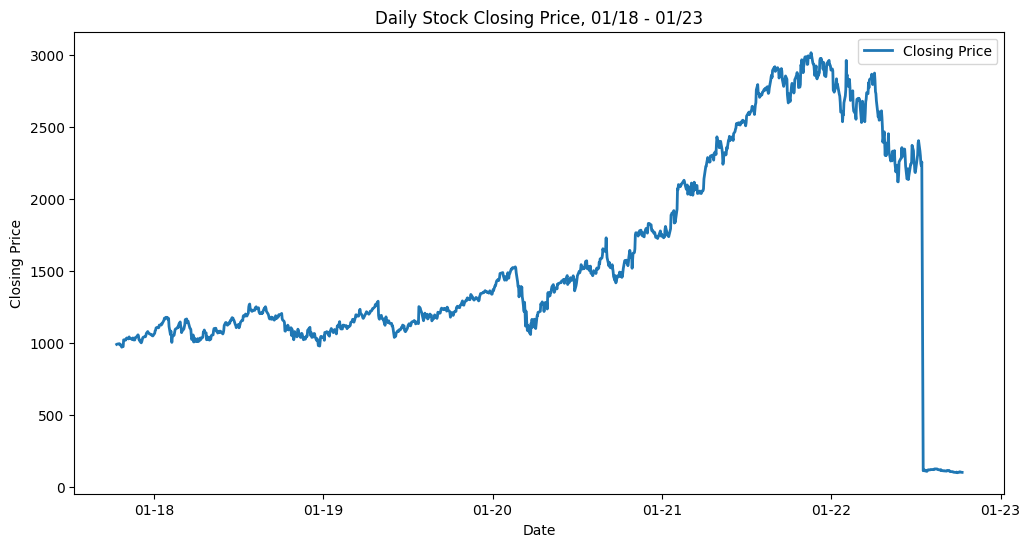

In [17]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(stocks.index, stocks['close'], label='Closing Price',linewidth = 2)
ax.set_title('Daily Stock Closing Price, 01/18 - 01/23')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

date_form = DateFormatter('%m-%y')
ax.xaxis.set_major_formatter(date_form)
plt.legend()

In [19]:
weekly_average_close = stocks['close'].resample('W').mean()
print(weekly_average_close)

date
2017-10-15 00:00:00+00:00     988.755
2017-10-22 00:00:00+00:00     989.928
2017-10-29 00:00:00+00:00     980.830
2017-11-05 00:00:00+00:00    1023.462
2017-11-12 00:00:00+00:00    1031.682
                               ...   
2022-09-18 00:00:00+00:00     106.116
2022-09-25 00:00:00+00:00     101.086
2022-10-02 00:00:00+00:00      98.376
2022-10-09 00:00:00+00:00     101.148
2022-10-16 00:00:00+00:00      98.710
Freq: W-SUN, Name: close, Length: 262, dtype: float64


Text(0, 0.5, 'Closing Price')

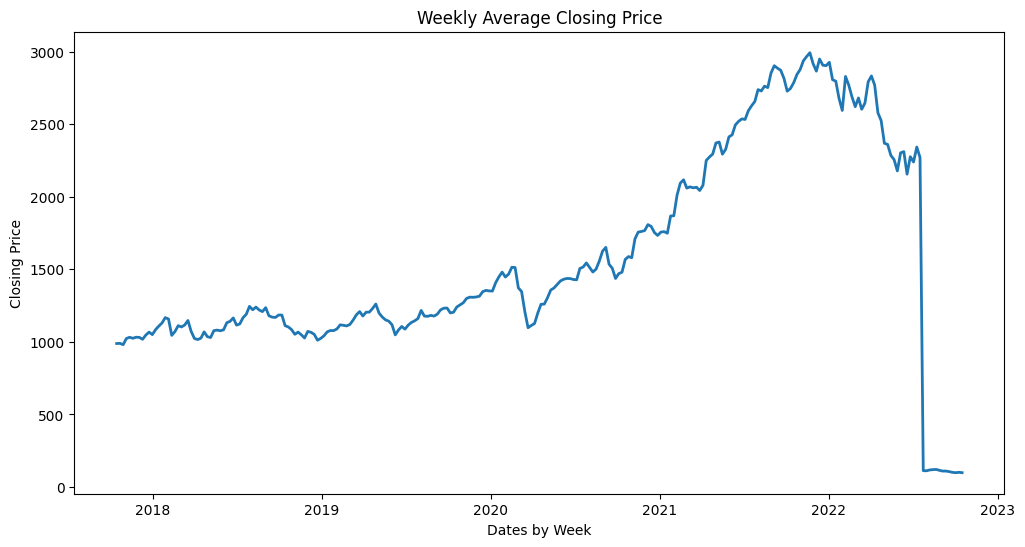

In [21]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

ax.plot(weekly_average_close.index, weekly_average_close,
        label='Weekly Average Closing Price', linewidth=2)

ax.set_title('Weekly Average Closing Price')
ax.set_xlabel('Dates by Week')
ax.set_ylabel('Closing Price')

In [26]:
roll_30 = stocks['close'].rolling(30, center=True).mean()
roll_30

date
2017-10-12 00:00:00+00:00   NaN
2017-10-13 00:00:00+00:00   NaN
2017-10-16 00:00:00+00:00   NaN
2017-10-17 00:00:00+00:00   NaN
2017-10-18 00:00:00+00:00   NaN
                             ..
2022-10-04 00:00:00+00:00   NaN
2022-10-05 00:00:00+00:00   NaN
2022-10-06 00:00:00+00:00   NaN
2022-10-07 00:00:00+00:00   NaN
2022-10-10 00:00:00+00:00   NaN
Name: close, Length: 1257, dtype: float64

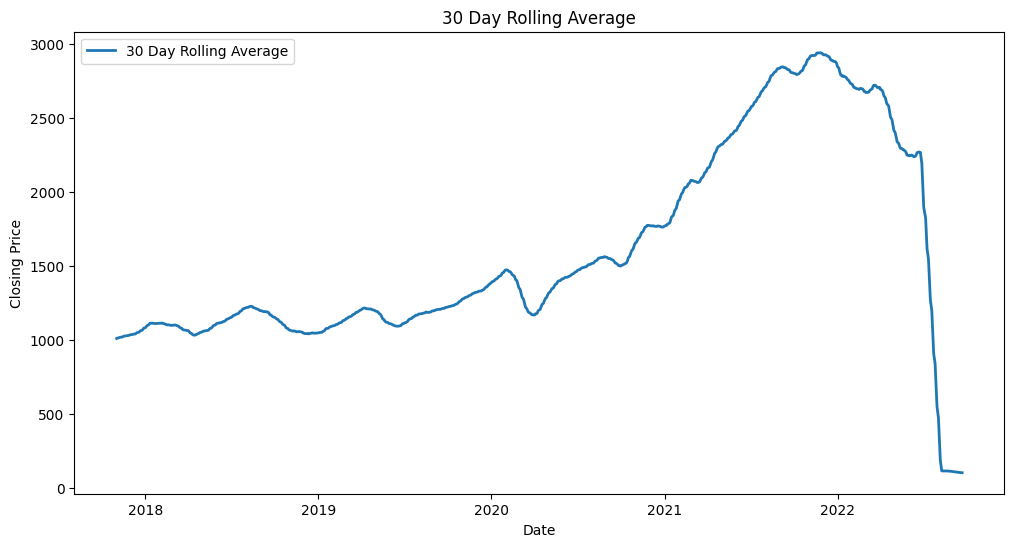

In [25]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

pd.plotting.register_matplotlib_converters()

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

ax.plot(roll_30.index, roll_30,
        label='30 Day Rolling Average', linewidth=2)

ax.set_title('30 Day Rolling Average')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
plt.legend()